In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import cv2
import os

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
import seaborn as sns

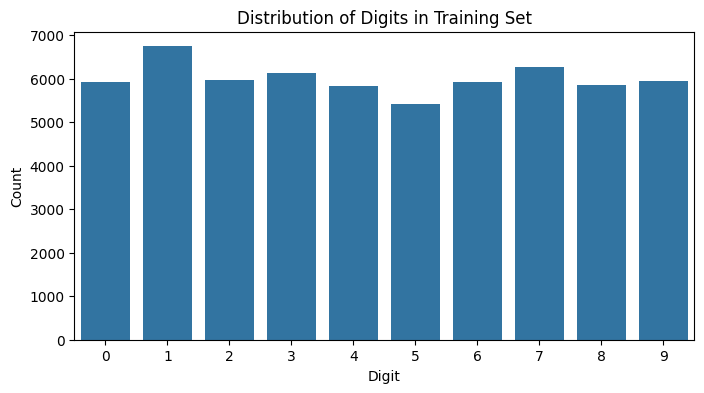

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(x=np.argmax(y_train, axis=1))
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [8]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\mouli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9130 - loss: 0.2897 - val_accuracy: 0.9844 - val_loss: 0.0502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9864 - loss: 0.0444 - val_accuracy: 0.9897 - val_loss: 0.0343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9880 - val_loss: 0.0338
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9901 - val_loss: 0.0338
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9955 - loss: 0.0145 - val_accuracy: 0.9913 - val_loss: 0.0289


In [11]:
model.save("digit_recognizer.h5")

In [12]:
model = load_model("digit_recognizer.h5")

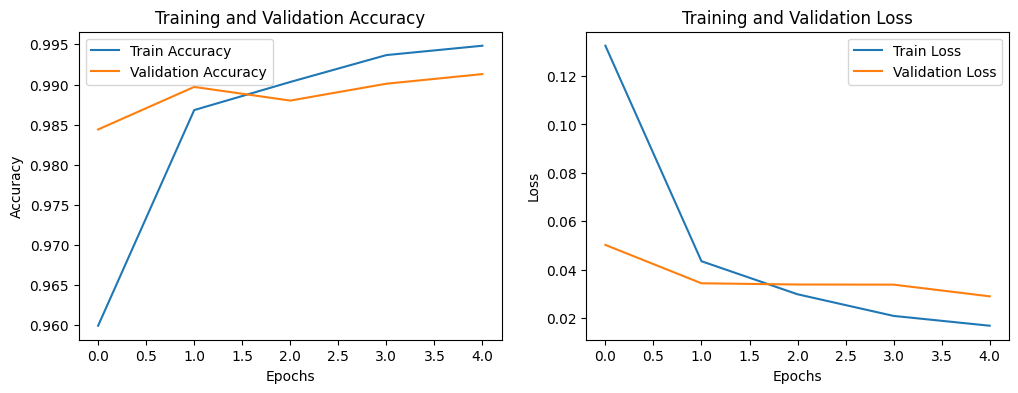

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [14]:
def visualize_predictions():
    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    indices = np.random.choice(len(x_test), 15, replace=False)
    
    for i, ax in enumerate(axes.flat):
        img = x_test[indices[i]].reshape(28, 28)
        prediction = model.predict(x_test[indices[i]].reshape(1, 28, 28, 1))
        predicted_label = np.argmax(prediction)
        
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Pred: {predicted_label}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


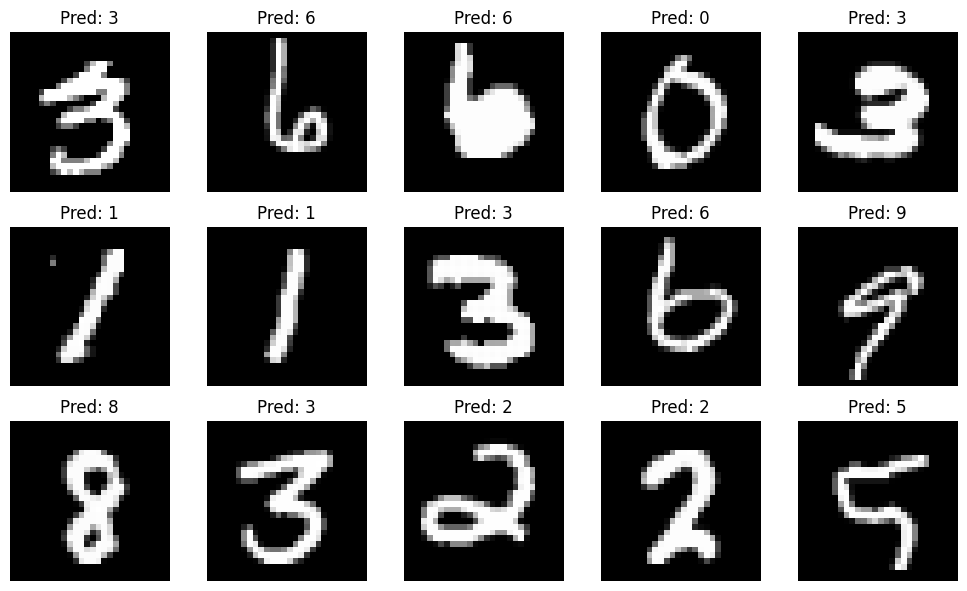

In [15]:
visualize_predictions()

In [16]:
from PIL import Image, ImageDraw
import tkinter as tk

In [17]:
def predict_digit(image):
    image = image.resize((28, 28)).convert('L')  # Convert to grayscale
    image = np.array(image)
    image = 255 - image  # Invert colors (black background, white digit)
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=(0, -1))
    prediction = model.predict(image)
    return np.argmax(prediction)

In [18]:
def draw_digit():
    root = tk.Tk()
    root.title("Draw a Digit")
    
    canvas = tk.Canvas(root, width=280, height=280, bg='white')
    canvas.pack()
    
    image = Image.new('L', (280, 280), 255)
    draw = ImageDraw.Draw(image)
    
    def paint(event):
        x, y = event.x, event.y
        canvas.create_oval(x, y, x+10, y+10, fill='black', outline='black')
        draw.ellipse([x, y, x+10, y+10], fill=0)
    
    canvas.bind('<B1-Motion>', paint)
    
    result_label = tk.Label(root, text="Predicted Digit: None", font=("Arial", 14))
    result_label.pack()
    
    def predict():
        image_resized = image.resize((28, 28))
        digit = predict_digit(image_resized)
        result_label.config(text=f"Predicted Digit: {digit}")
    
    def clear_canvas():
        canvas.delete("all")
        draw.rectangle([0, 0, 280, 280], fill=255)
        result_label.config(text="Predicted Digit: None")
    
    btn_predict = tk.Button(root, text='Predict', command=predict)
    btn_predict.pack()
    
    btn_clear = tk.Button(root, text='Clear', command=clear_canvas)
    btn_clear.pack()
    
    root.mainloop()

In [19]:
draw_digit()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
